# 3D Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import sys
sys.path.insert(0, "../src")
from cut_predictor import MeshPredictor

In [2]:
import tensorflow
tensorflow.__version__


'2.9.1'

In [3]:
doe = pd.read_csv('../data/doe.csv')
doe

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [4]:
data = pd.read_csv('../data/zt_all_raw.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)
data

,doe_id,node,x,y,z,deviation,thickness
0,1,1,176.889733,7.591760,-28.322733,-0.342817,0.950068
1,1,2,176.301200,7.829887,-28.645467,-0.298620,0.953896
2,1,3,174.503600,8.417000,-28.322733,-0.333188,0.953142
3,1,4,175.114100,8.240417,-28.645467,-0.294761,0.955891
4,1,5,172.701500,9.031983,-28.322733,-0.327943,0.954368
...,...,...,...,...,...,...,...
25071730,996,31972,90.337887,-2.260707,0.000000,0.051294,0.960178
25071731,996,31973,88.838437,1.417456,0.000000,0.076070,0.968302
25071732,996,31974,88.796363,2.543633,0.000000,0.042484,0.962362
25071733,996,31975,87.985487,0.844680,0.000000,0.099692,0.982796


In [5]:
reg = MeshPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Stempel_ID',
        'E',
        'Rp0',
        'Rp50'
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    position = ['x', 'y', 'z'],
    output = ['deviation']#, 'thickness']
)

In [6]:
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Stempel_ID : categorical [2, 3]
	- E : numerical [ 71.68198000000001  ...  200.03813 ]
	- Rp0 : numerical [ 133.18263199999998  ...  296.5565 ]
	- Rp50 : numerical [ 383.0418340000001  ...  629.5304000000001 ]
Input variables:
	- x : numerical, [ 0.6284683333330582 / 192.3881 ] 
	- y : numerical, [ -119.922 / 94.40363333333332 ] 
	- z : numerical, [ -73.0 / 0.0 ] 
Output variable(s):
	- deviation : numerical, [ -3.4451234340667702 / 8.456118583679201 ]

Inputs (25043148, 16)
Outputs (25043148, 1)
Total number of experiments: 879
Total number of samples: 25043148
Number of training samples: 22538833
Number of test samples: 2504315


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

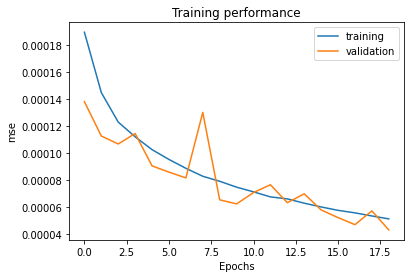

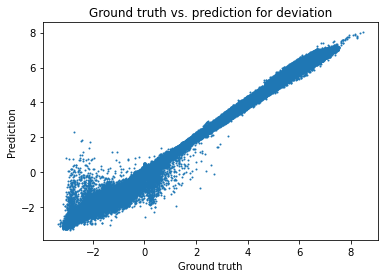

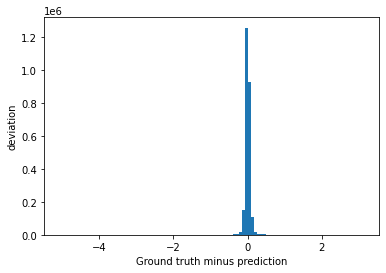

In [9]:
config = {
    'batch_size': 2048*16,
    'max_epochs': 20,
    'layers': [256, 128, 256, 256, 256],
    'dropout': 0.0,
    'learning_rate': 0.001,
    'activation': 'lrelu'
}

reg.custom_model(save_path='../models/best_3d_model', config=config, verbose=True)
reg.training_summary()

In [10]:
reg.load_network('../models/best_3d_model')

Doe_ID 148
7/7 [==============================] - 0s 12ms/step


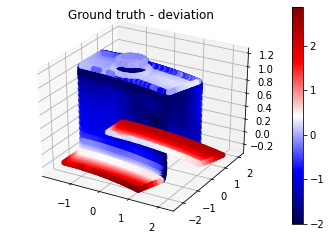

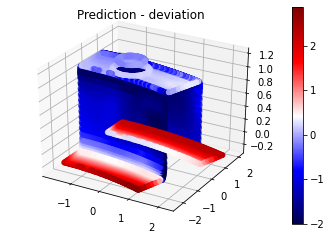

In [17]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare(idx)

In [19]:
geometry_50 = pd.read_csv('../data/geometry_zt50.csv')

parameters = {
    'Blechdicke': 1.01, 
    'Niederhalterkraft': 410.0, 
    'Ziehspalt': 2.4, 
    'Einlegeposition': 0, 
    'Stempel_ID': 3,
    'Ziehtiefe': 50,
    'E': 191.37245,
    'Rp0': 138.22696,
    'Rp50': 449.528189,
}

positions = geometry_50[['x', 'y', 'z']].to_numpy()
predictions = reg.predict(positions, parameters)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(positions[:, 0], positions[:, -2], positions[:, -1], 
    c=predictions[:, 0], 
    cmap='seismic') 
fig.colorbar(p, ax=ax)

FileNotFoundError: [Errno 2] No such file or directory: '../data/geometry_zt50.csv'

In [24]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 120

positions_zt30 = pd.read_csv('../data/geometry_zt30.csv')[['x', 'y', 'z']].to_numpy()
positions_zt50 = pd.read_csv('../data/geometry_zt50.csv')[['x', 'y', 'z']].to_numpy()
positions_zt70 = pd.read_csv('../data/geometry_zt70.csv')[['x', 'y', 'z']].to_numpy()

reg.interactive(positions_zt30)

interactive(children=(FloatSlider(value=1.1883700000000001, description='Blechdicke', max=1.48, min=0.99, step…